# **Introducción a R para Análisis de Datos**
## Capítulo 5: Análisis Exploratorio de Datos

**Autor:** Juan Martin Bellido  

**Descripción**  
El análisis exploratorio de datos, o EDA por sus siglas en inglés, es la aplicación de técnicas de estadística descriptiva para examinar un conjunto de datos. La visualización de datos, es decir, los gráficos, son una herramienta fundamental para el EDA. Solemos utilizar gráficos sencillos, ya que el objetivo principal es permitirnos llegar a conclusiones y no necesariamente conservar o exportar estas visualizaciones. 

**¿Feedback? ¿comentarios?** Por favor compártelo conmigo escribiéndome por [LinkedIn](https://www.linkedin.com/in/jmartinbellido/)  



## INDICE
---
1. Explorar series temporales
2. Explorar frecuencia
3. Explorar correlación
4. Explorar distribución
5. Ejercicios


Convenciones utilizadas en este documento
> 👉 *Esto es una nota u observación*

> ⚠️ *Esto es una advertencia*

In [ ]:
# instalamos librerías
install.packages("data.table")

In [ ]:
# importamos librerías
require(dplyr)
require(data.table)

In [ ]:
# (opcional) editamos las opciones globales para evitar que R utilice notación científica
options(scipen=999)

# 1. Explorar series temporales
---


### Primer gráfico de serie temporal

In [ ]:
# importamos DataFrame
df_jamesbond = fread("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv")
glimpse(df_jamesbond)

Rows: 26
Columns: 7
$ Film                <chr> "Dr. No", "From Russia with Love", "Goldfinger", "…
$ Year                <int> 1962, 1963, 1964, 1965, 1967, 1967, 1969, 1971, 19…
$ Actor               <chr> "Sean Connery", "Sean Connery", "Sean Connery", "S…
$ Director            <chr> "Terence Young", "Terence Young", "Guy Hamilton", …
$ `Box Office`        <dbl> 448.8, 543.8, 820.4, 848.1, 315.0, 514.2, 291.5, 4…
$ Budget              <dbl> 7.0, 12.6, 18.6, 41.9, 85.0, 59.9, 37.3, 34.7, 30.…
$ `Bond Actor Salary` <dbl> 0.6, 1.6, 3.2, 4.7, NA, 4.4, 0.6, 5.8, NA, NA, NA,…


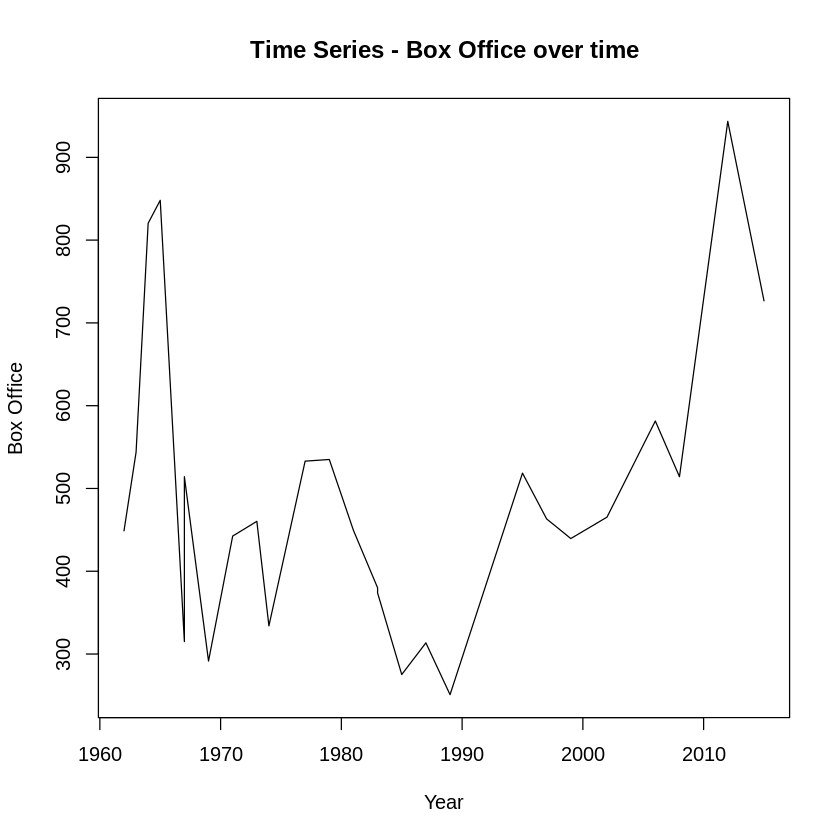

In [ ]:
# generamos un primer gráfico de serie temporal
plot(
  x = df_jamesbond$Year,
  y = df_jamesbond$`Box Office`,
  type = "l",
  main = "Time Series - Box Office over time",
  xlab = "Year",
  ylab = "Box Office"
)

### Gráfico avanzado de serie temporal

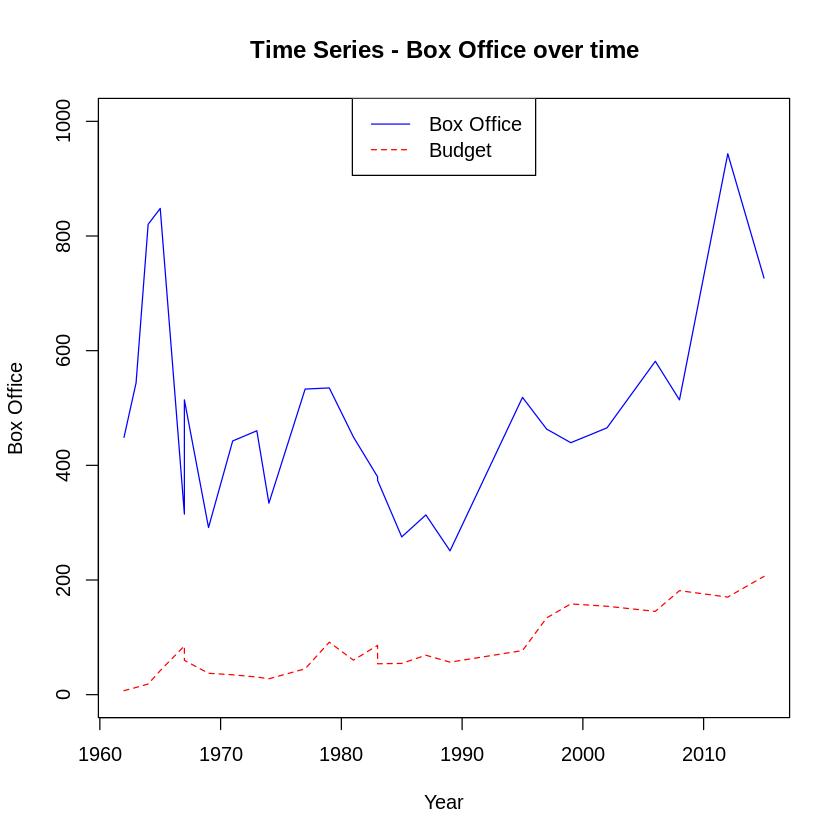

In [ ]:
# generamos un segundo gráfico de serie temporal con dos series
## primer gráfico
plot(
  x = df_jamesbond$Year,
  y = df_jamesbond$`Box Office`,
  type = "l",
  main = "Time Series - Box Office over time",
  xlab = "Year",
  ylab = "Box Office",
  col = 'blue',
  ylim = c(0,1000)
)

## añadimos un segundo gráfico
par(new = TRUE)                             
plot(
  x = df_jamesbond$Year,
  y = df_jamesbond$Budget,
  type = "l",
  col = "red",
  lty = 2,
  axes = FALSE, 
  xlab = "", 
  ylab = "",
  ylim = c(0,1000)
)

## añadimos leyenda
legend(
  x = "top",
  legend = c("Box Office", "Budget"),
  col = c("blue", "red"),
  lty = c(1, 2)
)

# 2. Explorar frecuencia
---


### Funciones para frecuencia

In [ ]:
# importamos dataset
data(Cars93,package="MASS") 
df_cars = Cars93
glimpse(df_cars)

Rows: 93
Columns: 27
$ Manufacturer       <fct> Acura, Acura, Audi, Audi, BMW, Buick, Buick, Buick,…
$ Model              <fct> Integra, Legend, 90, 100, 535i, Century, LeSabre, R…
$ Type               <fct> Small, Midsize, Compact, Midsize, Midsize, Midsize,…
$ Min.Price          <dbl> 12.9, 29.2, 25.9, 30.8, 23.7, 14.2, 19.9, 22.6, 26.…
$ Price              <dbl> 15.9, 33.9, 29.1, 37.7, 30.0, 15.7, 20.8, 23.7, 26.…
$ Max.Price          <dbl> 18.8, 38.7, 32.3, 44.6, 36.2, 17.3, 21.7, 24.9, 26.…
$ MPG.city           <int> 25, 18, 20, 19, 22, 22, 19, 16, 19, 16, 16, 25, 25,…
$ MPG.highway        <int> 31, 25, 26, 26, 30, 31, 28, 25, 27, 25, 25, 36, 34,…
$ AirBags            <fct> None, Driver & Passenger, Driver only, Driver & Pas…
$ DriveTrain         <fct> Front, Front, Front, Front, Rear, Front, Front, Rea…
$ Cylinders          <fct> 4, 6, 6, 6, 4, 4, 6, 6, 6, 8, 8, 4, 4, 6, 4, 6, 6, …
$ EngineSize         <dbl> 1.8, 3.2, 2.8, 2.8, 3.5, 2.2, 3.8, 5.7, 3.8, 4.9, 4…
$ Horsepower       

In [ ]:
# obtenemos valores únicos para variable categórica
unique(df_cars$Manufacturer)

[1] Acura         Audi          BMW           Buick         Cadillac     
 [6] Chevrolet     Chrylser      Chrysler      Dodge         Eagle        
[11] Ford          Geo           Honda         Hyundai       Infiniti     
[16] Lexus         Lincoln       Mazda         Mercedes-Benz Mercury      
[21] Mitsubishi    Nissan        Oldsmobile    Plymouth      Pontiac      
[26] Saab          Saturn        Subaru        Suzuki        Toyota       
[31] Volkswagen    Volvo        
32 Levels: Acura Audi BMW Buick Cadillac Chevrolet Chrylser Chrysler ... Volvo

In [ ]:
# tabla de frecuencia
table(df_cars$Type)


Compact   Large Midsize   Small  Sporty     Van 
     16      11      22      21      14       9 

In [ ]:
# tabla de contingencia
table(df_cars$Origin,df_cars$Type)

         
          Compact Large Midsize Small Sporty Van
  USA           7    11      10     7      8   5
  non-USA       9     0      12    14      6   4

In [ ]:
# tabla de contingencia en valores relativos
contingency_table = table(df_cars$Origin,df_cars$Type) # creamos una tabla de contingencia
prop.table(contingency_table) # utilizamos la función prop.table() para convertir la tabla de contingencia en valores relativos

         
             Compact      Large    Midsize      Small     Sporty        Van
  USA     0.07526882 0.11827957 0.10752688 0.07526882 0.08602151 0.05376344
  non-USA 0.09677419 0.00000000 0.12903226 0.15053763 0.06451613 0.04301075

### Gráfico de barra

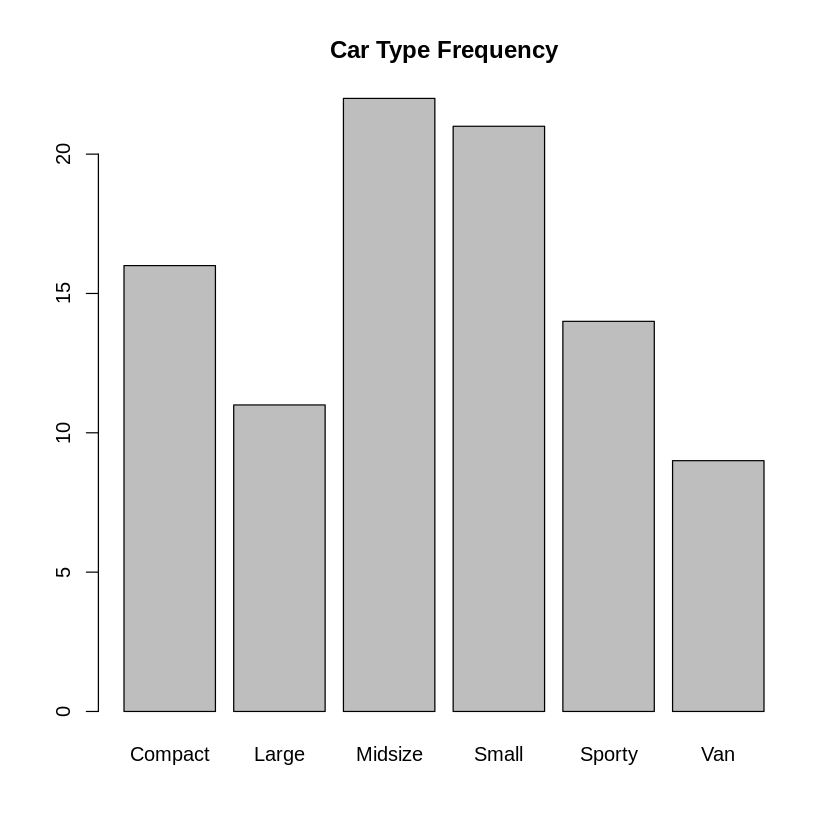

In [ ]:
# gráfico de barra vertical
plot = table(df_cars$Type)
barplot(
  plot,
  main = 'Car Type Frequency'
) 

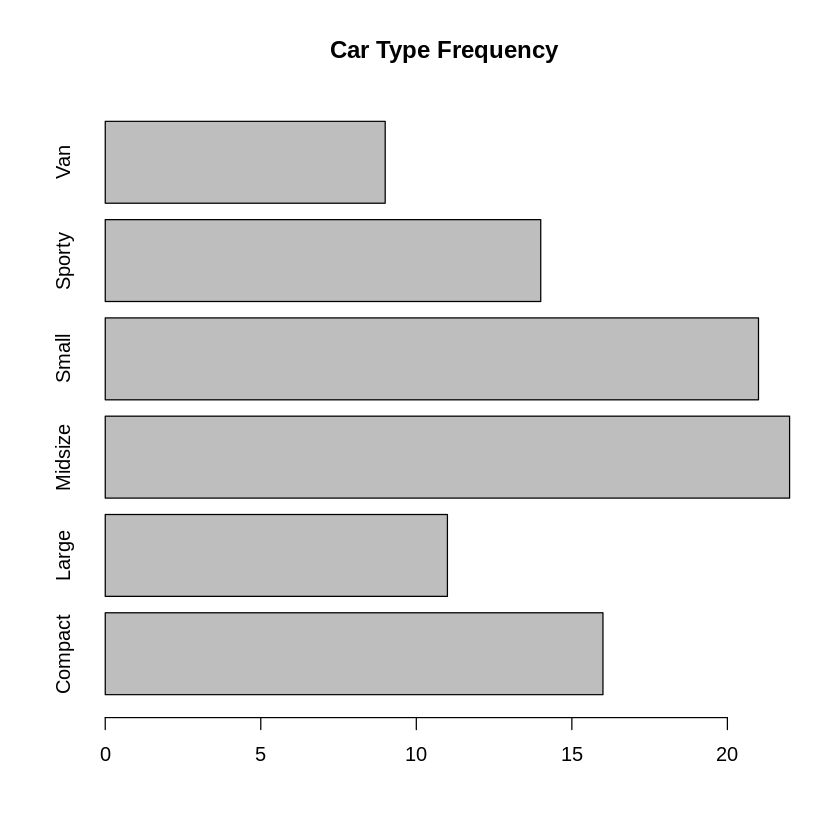

In [ ]:
# gráfico de barra horrizontal
plot = table(df_cars$Type)

barplot(
  plot,
  horiz=TRUE,
  main = 'Car Type Frequency'
) 

# 3. Explorar correlación
---


### Funciones para correlación

In [ ]:
# importamos dataset
data(Cars93,package="MASS") 
df_cars = Cars93
glimpse(df_cars)

Rows: 93
Columns: 27
$ Manufacturer       <fct> Acura, Acura, Audi, Audi, BMW, Buick, Buick, Buick,…
$ Model              <fct> Integra, Legend, 90, 100, 535i, Century, LeSabre, R…
$ Type               <fct> Small, Midsize, Compact, Midsize, Midsize, Midsize,…
$ Min.Price          <dbl> 12.9, 29.2, 25.9, 30.8, 23.7, 14.2, 19.9, 22.6, 26.…
$ Price              <dbl> 15.9, 33.9, 29.1, 37.7, 30.0, 15.7, 20.8, 23.7, 26.…
$ Max.Price          <dbl> 18.8, 38.7, 32.3, 44.6, 36.2, 17.3, 21.7, 24.9, 26.…
$ MPG.city           <int> 25, 18, 20, 19, 22, 22, 19, 16, 19, 16, 16, 25, 25,…
$ MPG.highway        <int> 31, 25, 26, 26, 30, 31, 28, 25, 27, 25, 25, 36, 34,…
$ AirBags            <fct> None, Driver & Passenger, Driver only, Driver & Pas…
$ DriveTrain         <fct> Front, Front, Front, Front, Rear, Front, Front, Rea…
$ Cylinders          <fct> 4, 6, 6, 6, 4, 4, 6, 6, 6, 8, 8, 4, 4, 6, 4, 6, 6, …
$ EngineSize         <dbl> 1.8, 3.2, 2.8, 2.8, 3.5, 2.2, 3.8, 5.7, 3.8, 4.9, 4…
$ Horsepower       

In [ ]:
# calculamos el coeficiente de correlación entre dos variables numéricas
cor(df_cars$Price,df_cars$Weight)

[1] 0.647179

In [ ]:
# generamos una matrix de correlación
df_cars[,c('Price','EngineSize','Horsepower','Passengers','Weight')] %>% cor()

,Price,EngineSize,Horsepower,Passengers,Weight
Price,1.00000000,0.5974254,0.788217578,0.057860074,0.6471790
EngineSize,0.59742539,1.0000000,0.732119730,0.372721168,0.8450753
Horsepower,0.78821758,0.7321197,1.000000000,0.009263668,0.7387975
Passengers,0.05786007,0.3727212,0.009263668,1.000000000,0.5532730
Weight,0.64717901,0.8450753,0.738797516,0.553272980,1.0000000


### Gráfico de dispersión

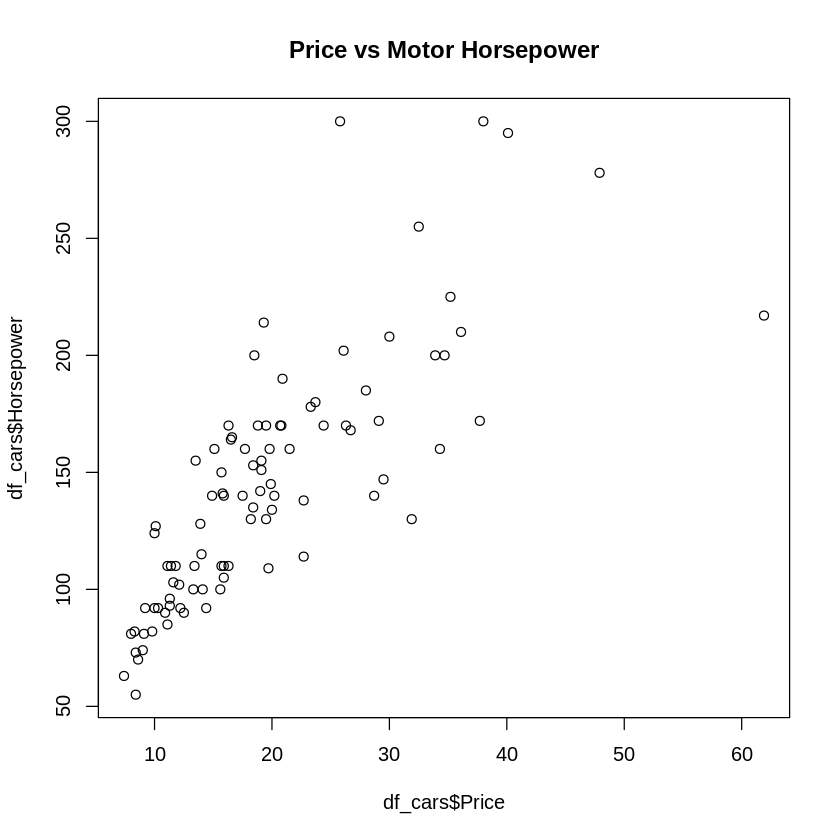

In [ ]:
# generamos un grárico de dispersión
plot(
  x = df_cars$Price,
  y = df_cars$Horsepower,
  type = 'p',
  main = 'Price vs Motor Horsepower'
)

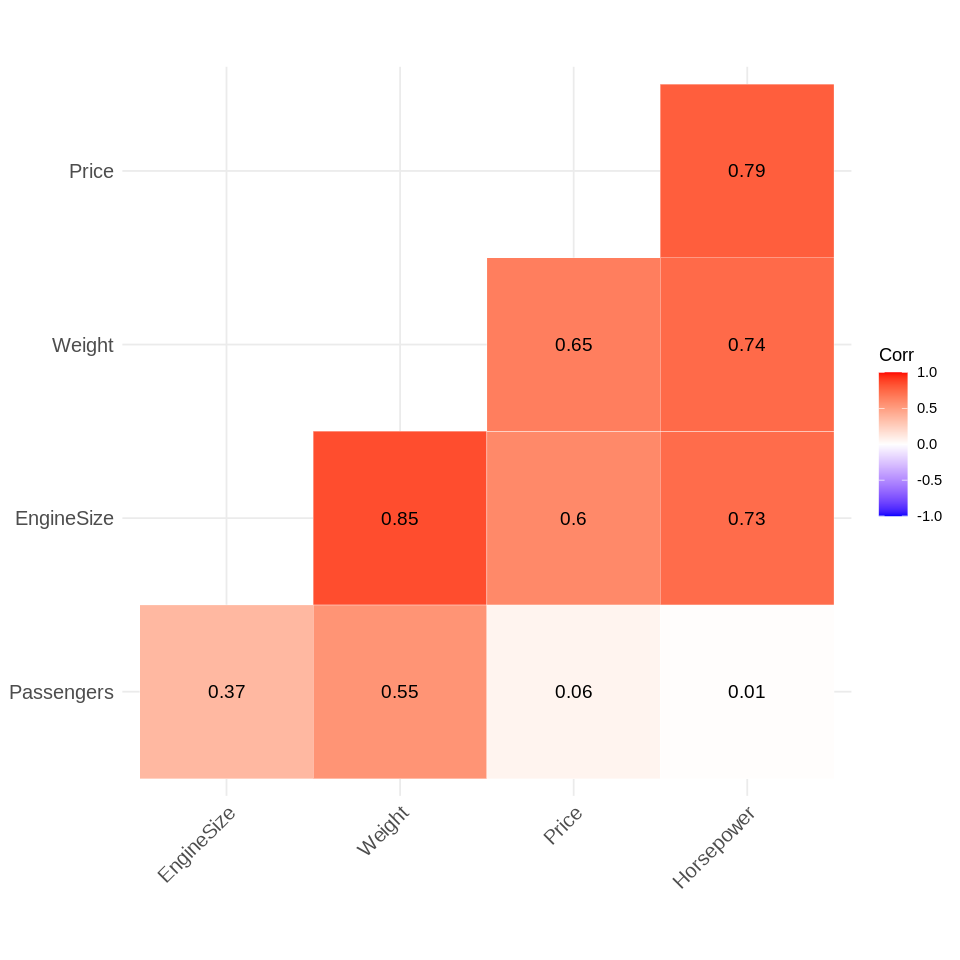

In [ ]:
# convertimos matriz de correlación en heatmap
## calculamos matriz de correlación
corr_matrix = df_cars[,c('Price','EngineSize','Horsepower','Passengers','Weight')] %>% cor(use="complete.obs")

## graficamos heatmap


In [ ]:
# calculamos la matriz de correlación
corr_matrix = df_who[df_who$Continent == 'Africa',4:12] %>% cor(use="complete.obs")

# graficamos heatmap
options(repr.plot.width=10, repr.plot.height=10)

# 4. Explorar distribución
---


In [ ]:
# importamos dataset
data(Cars93,package="MASS") 
df_cars = Cars93
glimpse(df_cars)

Rows: 93
Columns: 27
$ Manufacturer       <fct> Acura, Acura, Audi, Audi, BMW, Buick, Buick, Buick,…
$ Model              <fct> Integra, Legend, 90, 100, 535i, Century, LeSabre, R…
$ Type               <fct> Small, Midsize, Compact, Midsize, Midsize, Midsize,…
$ Min.Price          <dbl> 12.9, 29.2, 25.9, 30.8, 23.7, 14.2, 19.9, 22.6, 26.…
$ Price              <dbl> 15.9, 33.9, 29.1, 37.7, 30.0, 15.7, 20.8, 23.7, 26.…
$ Max.Price          <dbl> 18.8, 38.7, 32.3, 44.6, 36.2, 17.3, 21.7, 24.9, 26.…
$ MPG.city           <int> 25, 18, 20, 19, 22, 22, 19, 16, 19, 16, 16, 25, 25,…
$ MPG.highway        <int> 31, 25, 26, 26, 30, 31, 28, 25, 27, 25, 25, 36, 34,…
$ AirBags            <fct> None, Driver & Passenger, Driver only, Driver & Pas…
$ DriveTrain         <fct> Front, Front, Front, Front, Rear, Front, Front, Rea…
$ Cylinders          <fct> 4, 6, 6, 6, 4, 4, 6, 6, 6, 8, 8, 4, 4, 6, 4, 6, 6, …
$ EngineSize         <dbl> 1.8, 3.2, 2.8, 2.8, 3.5, 2.2, 3.8, 5.7, 3.8, 4.9, 4…
$ Horsepower       

In [ ]:
# calculamos media para una variable
mean(df_cars$Price)

[1] 19.50968

In [ ]:
# calculamos mediana para una variable
median(df_cars$Price)

[1] 17.7

In [ ]:
# la función summary() proporciona automáticamente métricas de distribución para todas las variables numéricas en el df
summary(df_cars)

    Manufacturer     Model         Type      Min.Price         Price      
 Chevrolet: 8    100    : 1   Compact:16   Min.   : 6.70   Min.   : 7.40  
 Ford     : 8    190E   : 1   Large  :11   1st Qu.:10.80   1st Qu.:12.20  
 Dodge    : 6    240    : 1   Midsize:22   Median :14.70   Median :17.70  
 Mazda    : 5    300E   : 1   Small  :21   Mean   :17.13   Mean   :19.51  
 Pontiac  : 5    323    : 1   Sporty :14   3rd Qu.:20.30   3rd Qu.:23.30  
 Buick    : 4    535i   : 1   Van    : 9   Max.   :45.40   Max.   :61.90  
 (Other)  :57    (Other):87                                               
   Max.Price       MPG.city      MPG.highway                  AirBags  
 Min.   : 7.9   Min.   :15.00   Min.   :20.00   Driver & Passenger:16  
 1st Qu.:14.7   1st Qu.:18.00   1st Qu.:26.00   Driver only       :43  
 Median :19.6   Median :21.00   Median :28.00   None              :34  
 Mean   :21.9   Mean   :22.37   Mean   :29.09                          
 3rd Qu.:25.3   3rd Qu.:25.00   3rd Qu.:

In [ ]:
# la función quantile() proporciona distribución en cuartiles
quantile(df_cars$Price)

0%  25%  50%  75% 100% 
 7.4 12.2 17.7 23.3 61.9

In [ ]:
# podemos editar la distribución
## editamos para obtener distribución en deciles
quantile(df_cars$Price,probs=c(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1))

0%   10%   20%   30%   40%   50%   60%   70%   80%   90%  100% 
 7.40  9.84 11.34 13.74 15.78 17.70 19.34 20.84 26.22 33.62 61.90

In [ ]:
# generamos distribución en deciles, filtramos por un decil
df_cars_price_distribution = quantile(df_cars$Price,probs=c(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1))
df_cars_price_distribution[9]

80% 
26.22

### Gráfico de histograma

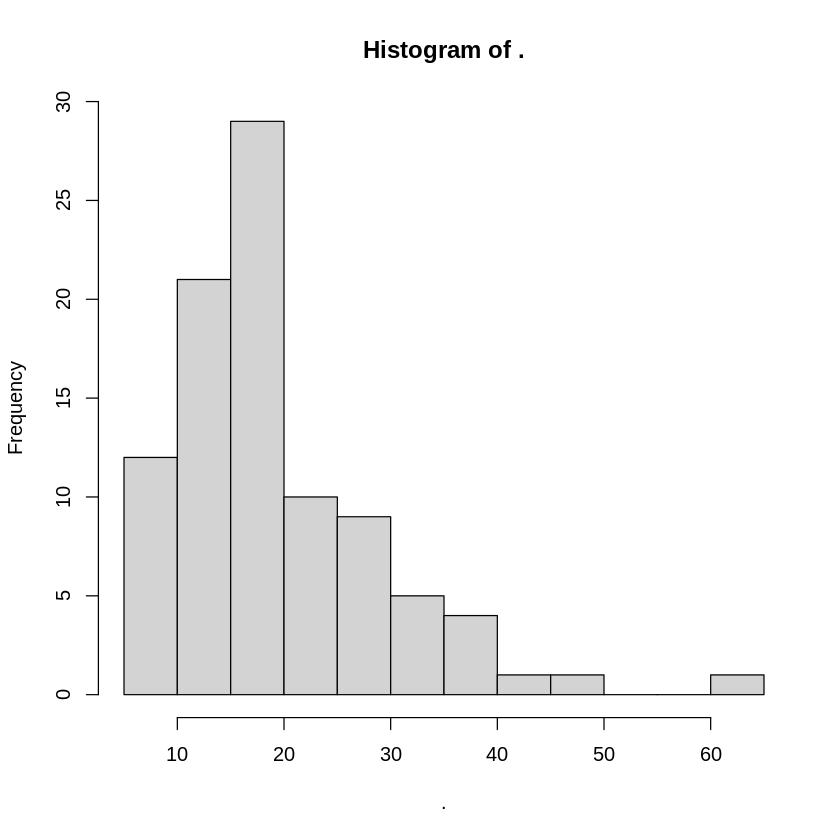

In [ ]:
# generamos histograma
df_cars$Price %>% hist()

### Gráfico de boxplot

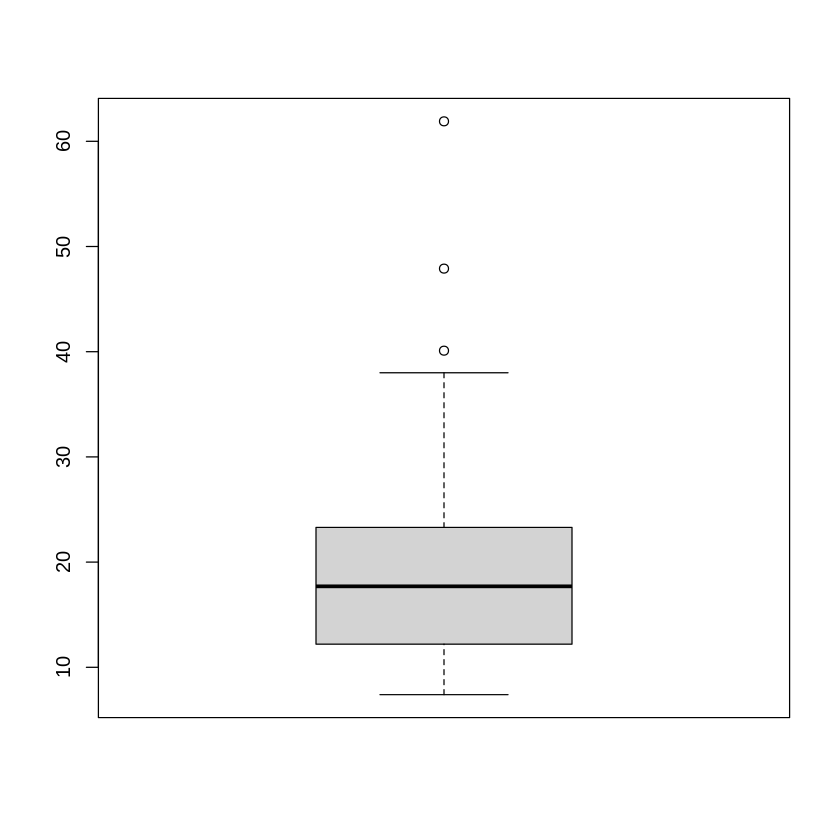

In [ ]:
# generamos un boxplot sencillo
boxplot(df_cars$Price)

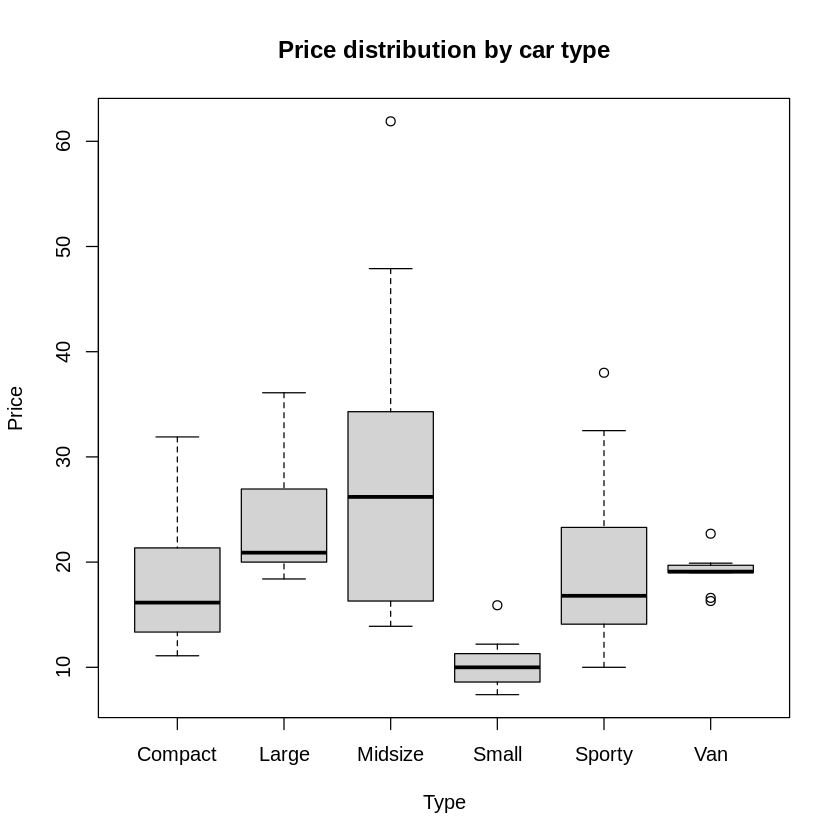

In [ ]:
# generamos un boxplot más complejo, agrupando por variable categórica
boxplot(
  Price ~ Type,
  data = df_cars,
  main = 'Price distribution by car type'
)

### Matriz de dispersión


Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”


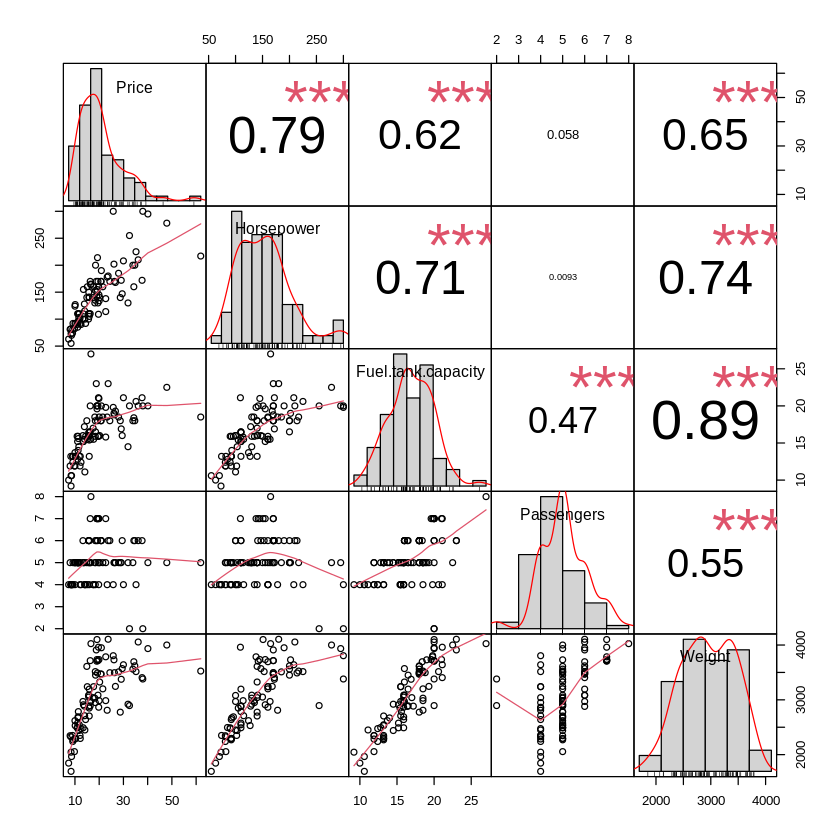

In [ ]:
# graficamos matriz de dispersión
chart.Correlation(
  df_cars[,c('Price','Horsepower','Fuel.tank.capacity','Passengers','Weight')], 
  histogram=TRUE
)

# 5. Ejercicios
---
> 👉 Puedes encontrar las soluciones a los ejercicios [aquí](https://nbviewer.org/github/SomosDataWizards/R-Curso-Introductorio-Ejercicios/blob/main/Capitulo_5_Ejercicios.ipynb)

### Ejercicio #1
¿Cuántas películas de James Bond ha protagonizado *Sean Connery*? Crear una tabla de frecuencia.

> Dataset https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv

In [ ]:
# importamos librerías
require(data.table)

Loading required package: data.table



In [ ]:
# importamos dataset
df_jamesbond = data.table::fread("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv")

### Ejercicio #2

El dataset debajo incluye datos sobre salarios para empleados públicos en EEUU. Graficar un boxplot para estudiar distribución del salario según raza ("*race*"). Incluir únicamente empleados f*ull-time* y las siguientes razas: *Hispanic/latino, White y Black or African American*.

> Dataset https://data-wizards.s3.amazonaws.com/datasets/employees.csv

In [ ]:
# importamos librerías
require(data.table)

In [ ]:
# importamos dataset
df_employees = fread("https://data-wizards.s3.amazonaws.com/datasets/employees.csv")
glimpse(df_employees)

Rows: 2,000
Columns: 10
$ UNIQUE_ID         <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…
$ POSITION_TITLE    <chr> "ASSISTANT DIRECTOR (EX LVL)", "LIBRARY ASSISTANT", …
$ DEPARTMENT        <chr> "Municipal Courts Department", "Library", "Houston P…
$ BASE_SALARY       <dbl> 121862, 26125, 45279, 63166, 56347, 66614, 71680, 42…
$ RACE              <chr> "Hispanic/Latino", "Hispanic/Latino", "White", "Whit…
$ EMPLOYMENT_TYPE   <chr> "Full Time", "Full Time", "Full Time", "Full Time", …
$ GENDER            <chr> "Female", "Female", "Male", "Male", "Male", "Male", …
$ EMPLOYMENT_STATUS <chr> "Active", "Active", "Active", "Active", "Active", "A…
$ HIRE_DATE         <IDate> 2006-06-12, 2000-07-19, 2015-02-03, 1982-02-08, 19…
$ JOB_DATE          <IDate> 2012-10-13, 2010-09-18, 2015-02-03, 1991-05-25, 19…
